<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 3: Large-Scale Data Exploration for Insider Threat Detection  (2022)
---

The completion of this worksheet is worth a **maximum of 45 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been asked to investigate a potential security threat within an organisation. Building on your previous worksheet expertise, you will need to apply your skills and knowledge of data analytics and visualisation to examine and explore the datasets methodically to uncover which employee is acting as a threat and why. The company have provided you with activity logs for various user interactions for the past 6 months, resulting in a lot of data that they need your expertise for to decipher. They want to have a report that details the investigation that you have carried out, details of the suspected individual, and a clear rationale as to why this suspect is flagged. You will need to document your investigation, giving clear justification for your process using Markdown annotation within your notebook. You will need to provide a clear rationale for why you suspect a given individual to be acting as a threat, based on the pattern of activity that you identify.

<i>This coursework is specifically designed to challenge your critical thinking and creativity, and is designed as an open problem. Examine the data and try to think how an individual user may appear as an anomaly against the remainder of the data. This could be an anomaly compared to a group of users, or an anomaly as compared over time.</i>

### Assessment and Marking
---

Marks will be allocated within the following criteria:

* **Identification and justification of the suspicious behaviour (15)**
* **Analytical process and reasoning to deduce the suspicious behaviour (15)**
* **Use of informative visualisation and data exploration techniques (10)**
* **Clarity and professional presentation (5)**

To achieve the higher end of the grade scale, you need to demonstrate creativity in how you approach the problem of identifying malicious behaviours, and ensure that you have accounted for multiple anomalies across the set of data available.

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---


## Load in the data

In [1]:
# DO NOT MODIFY THIS CELL - this cell is splitting the data to provide a suitable subset of data to work with for this task.
# If you change this cell your output will differ from that expected and could impact your mark.

import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

dataset_list = ['onlinebargains']
DATASET = dataset_list[0]

def load_data(DATASET):
    if DATASET in dataset_list:
        email_data = pd.read_csv('./T3_data/' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./T3_data/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./T3_data/' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./T3_data/' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./T3_data/' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./T3_data/' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)
employee_data

,user,role,email,pc
0,usr-uda,Security,usr-uda@onlinebargains.com,pc0
1,usr-hhe,Security,usr-hhe@onlinebargains.com,pc1
2,usr-vxr,Finance,usr-vxr@onlinebargains.com,pc2
3,usr-nba,Finance,usr-nba@onlinebargains.com,pc3
4,usr-hqt,Finance,usr-hqt@onlinebargains.com,pc4
...,...,...,...,...
244,usr-jwo,Finance,usr-jwo@onlinebargains.com,pc244
245,usr-hiz,Security,usr-hiz@onlinebargains.com,pc245
246,usr-svz,Services,usr-svz@onlinebargains.com,pc246
247,usr-ndr,HR,usr-ndr@onlinebargains.com,pc247


The cell above is creating a set of DataFrames to work with. The set of tables are named as follows:

* employee_data
* login_data
* usb_data
* web_data
* file_data
* email_data



# 1. Begin investigation

To start I will investigate...

In [2]:
file_data['filename'].unique()

array(['/policy', '/do_not_delete', '/newsletter', '/tech', '/secret',
       '/docs/employment', '/docs/general', '/system/general',
       '/company_profile', '/misc', '/security', '/newsletter/general',
       '/docs/committee', '/FYEO', '/docs/social', '/docs', '/private',
       '/security/physical', '/private/staffreview', '/backups',
       '/system/source', '/system', '/security/ids', '/system/site',
       '/dev', '/docs/clients', '/docs/ip'], dtype=object)

In [3]:
file_data

,datetime,user,filename
0,2020-01-01 00:42:25.544227,usr-ipd,/policy
1,2020-01-01 00:50:48.627385,usr-hyo,/do_not_delete
2,2020-01-01 01:01:38.409035,usr-hyo,/newsletter
3,2020-01-01 01:14:49.310254,usr-hyo,/tech
4,2020-01-01 01:17:22.914953,usr-hyo,/newsletter
...,...,...,...
3799265,2020-11-30 23:40:54.695141,usr-lnn,/newsletter/general
3799266,2020-11-30 23:48:35.828385,usr-nic,/secret
3799267,2020-11-30 23:49:02.955959,usr-vul,/company_profile
3799268,2020-11-30 23:49:28.216624,usr-nic,/private/staffreview


In [4]:
client_file = file_data.loc[file_data['filename']=='/docs/clients']

In [5]:
#Show all access record of users who accessed to clients document
client_file['month'] = client_file['datetime'].dt.month

client_file

/tmp/ipykernel_5449/2349794746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_file['month'] = client_file['datetime'].dt.month


,datetime,user,filename,month
115,2020-01-01 04:46:15.298311,usr-hci,/docs/clients,1
358,2020-01-01 06:06:28.849977,usr-rjw,/docs/clients,1
380,2020-01-01 06:10:42.033664,usr-xrb,/docs/clients,1
386,2020-01-01 06:11:26.972366,usr-upm,/docs/clients,1
474,2020-01-01 06:28:54.786324,usr-vdx,/docs/clients,1
...,...,...,...,...
3798364,2020-11-30 18:26:00.923285,usr-rkl,/docs/clients,11
3798459,2020-11-30 18:41:54.788018,usr-qir,/docs/clients,11
3798570,2020-11-30 19:01:12.489525,usr-jok,/docs/clients,11
3798732,2020-11-30 19:35:28.756520,usr-yfr,/docs/clients,11


         datetime  filename  month
user                              
usr-rjv      1250      1250   1250
usr-wer      1239      1239   1239
usr-tiz      1224      1224   1224
usr-eie      1213      1213   1213
usr-eqp      1202      1202   1202


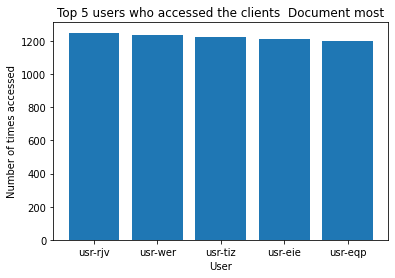

In [6]:
#Bar Chart shows Top 5 users who accessed the secret file most

user_grouped = client_file.groupby('user').count()
user_sorted = user_grouped.sort_values('filename', ascending=False)
#print(user_sorted)
top_5 = user_sorted.head(5)
min_5 = user_sorted.tail(5)
print(top_5)
plt.bar(top_5.index, top_5['filename'])
# Set the x-axis label
plt.xlabel('User')

# Set the y-axis label
plt.ylabel('Number of times accessed')

# Set the title of the chart
plt.title('Top 5 users who accessed the clients  Document most')

# Show the plot
plt.show()

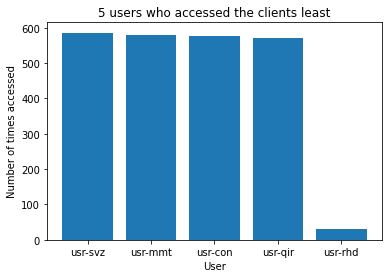

In [7]:
least_5 = user_sorted.tail(5)
plt.bar(least_5.index, least_5['filename'])
# Set the x-axis label
plt.xlabel('User')

# Set the y-axis label
plt.ylabel('Number of times accessed')

# Set the title of the chart
plt.title('5 users who accessed the clients least')

# Show the plot
plt.show()

In [8]:
#Print all users who accessed to the client data
client_access = client_file['user'].unique()

client_access_df = pd.DataFrame()
#print(client_access)
for i in client_access:
    if i in employee_data['user'].values:
        matching_row = employee_data[employee_data['user'] == i]
        
        client_access_df = pd.concat([client_access_df, matching_row])
        
client_access_df


,user,role,email,pc
204,usr-hci,Services,usr-hci@onlinebargains.com,pc204
226,usr-rjw,Services,usr-rjw@onlinebargains.com,pc226
181,usr-xrb,Services,usr-xrb@onlinebargains.com,pc181
27,usr-upm,Services,usr-upm@onlinebargains.com,pc27
131,usr-vdx,Services,usr-vdx@onlinebargains.com,pc131
...,...,...,...,...
130,usr-cvk,Legal,usr-cvk@onlinebargains.com,pc130
72,usr-rac,Services,usr-rac@onlinebargains.com,pc72
238,usr-tbt,Services,usr-tbt@onlinebargains.com,pc238
184,usr-hga,Legal,usr-hga@onlinebargains.com,pc184


In [9]:
#count the role who accessed to client file
role_counts = client_access_df['role'].value_counts()
print(role_counts)



Services    49
Legal       37
Finance     30
Director     1
Name: role, dtype: int64


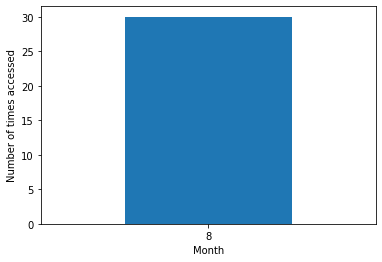

In [10]:
#Bar chart to show the access of usr-rhd
rhd_df = client_file[client_file['user'] == 'usr-rhd']
rhd_count = rhd_df['month'].value_counts().sort_index()
rhd_count.plot(kind='bar', label = "usr-rhd")

plt.xticks(rotation=0)

plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Number of times accessed')

plt.show()
#rhd_df

In [11]:
rhd_df

,datetime,user,filename,month
2462964,2020-08-05 08:22:02.124616,usr-rhd,/docs/clients,8
2463343,2020-08-05 09:00:57.812958,usr-rhd,/docs/clients,8
2465243,2020-08-05 10:57:56.551124,usr-rhd,/docs/clients,8
2465566,2020-08-05 11:14:07.651841,usr-rhd,/docs/clients,8
2465589,2020-08-05 11:15:32.100920,usr-rhd,/docs/clients,8
2465665,2020-08-05 11:19:35.422989,usr-rhd,/docs/clients,8
2466090,2020-08-05 11:41:44.882480,usr-rhd,/docs/clients,8
2467350,2020-08-05 12:50:59.042643,usr-rhd,/docs/clients,8
2467434,2020-08-05 12:55:58.319592,usr-rhd,/docs/clients,8
2467576,2020-08-05 13:03:20.534977,usr-rhd,/docs/clients,8


In [12]:
usb_data

,datetime,user,action,pc
0,2020-01-01 04:34:12.544490,usr-mcr,usb_insert,pc13
1,2020-01-01 04:38:24.821774,usr-udb,usb_insert,pc66
2,2020-01-01 04:40:59.860587,usr-con,usb_insert,pc146
3,2020-01-01 04:45:49.701116,usr-xsn,usb_insert,pc30
4,2020-01-01 04:49:10.958272,usr-rjw,usb_insert,pc226
...,...,...,...,...
460707,2020-11-30 21:52:23.963103,usr-ebj,usb_insert,pc107
460708,2020-11-30 21:59:12.697110,usr-ebj,usb_remove,pc107
460709,2020-11-30 22:05:32.796175,usr-fbi,usb_remove,pc177
460710,2020-11-30 22:28:48.961482,usr-fbi,usb_insert,pc177


In [13]:
email_data

,datetime,sender,recipient
0,2020-01-01 00:25:57.087778,usr-hyo@onlinebargains.com,usr-utk@onlinebargains.com
1,2020-01-01 00:47:20.397203,usr-hhe@onlinebargains.com,usr-ipd@onlinebargains.com
2,2020-01-01 00:48:40.053151,usr-hhe@onlinebargains.com,usr-eid@onlinebargains.com
3,2020-01-01 00:49:16.631294,usr-ipd@onlinebargains.com,usr-yfr@onlinebargains.com
4,2020-01-01 00:53:43.526221,usr-hfz@onlinebargains.com,usr-gnv@onlinebargains.com
...,...,...,...
3795054,2020-11-30 23:29:32.371501,usr-lnn@onlinebargains.com,usr-dmi@onlinebargains.com
3795055,2020-11-30 23:31:01.419672,usr-alj@onlinebargains.com,usr-okf@onlinebargains.com
3795056,2020-11-30 23:34:34.291689,usr-fbi@onlinebargains.com,usr-gok@onlinebargains.com
3795057,2020-11-30 23:46:33.302502,usr-nic@onlinebargains.com,usr-gsw@onlinebargains.com


In [14]:
#Dataframe to see only the access of /secret file
secret_file = file_data.loc[file_data['filename']=='/secret']
secret_file['month'] = secret_file['datetime'].dt.month
secret_file['day'] = secret_file['datetime'].dt.day


secret_file

/tmp/ipykernel_5449/590689135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secret_file['month'] = secret_file['datetime'].dt.month
/tmp/ipykernel_5449/590689135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secret_file['day'] = secret_file['datetime'].dt.day


,datetime,user,filename,month,day
5,2020-01-01 01:18:58.475142,usr-ipd,/secret,1,1
18,2020-01-01 02:36:43.787897,usr-hhe,/secret,1,1
44,2020-01-01 03:45:20.025344,usr-hfz,/secret,1,1
67,2020-01-01 04:17:20.990611,usr-ypo,/secret,1,1
81,2020-01-01 04:25:41.808866,usr-iba,/secret,1,1
...,...,...,...,...,...
3799210,2020-11-30 22:14:29.362658,usr-ays,/secret,11,30
3799219,2020-11-30 22:24:35.600769,usr-rhd,/secret,11,30
3799243,2020-11-30 22:51:54.184515,usr-ays,/secret,11,30
3799248,2020-11-30 23:08:42.513404,usr-dmi,/secret,11,30


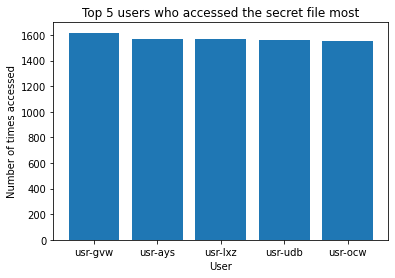

In [79]:
#Bar Chart shows Top 5 users who accessed the secret file most

user_grouped = secret_file.groupby('user').count()
user_sorted = user_grouped.sort_values('datetime', ascending=False)
top_5_secret = user_sorted.head(5)
min5 = user_sorted.tail(5)

plt.bar(top_5_secret.index, top_5['datetime'])
# Set the x-axis label
plt.xlabel('User')

# Set the y-axis label
plt.ylabel('Number of times accessed')

# Set the title of the chart
plt.title('Top 5 users who accessed the secret file most')

# Show the plot
plt.show()

In [85]:
gvw_secret_file = secret_file[secret_file['user'] == 'usr-gvw']
gvw_secret_file

,datetime,user,filename,month,day
3409,2020-01-01 10:56:13.454458,usr-gvw,/secret,1,1
5875,2020-01-01 13:08:50.149717,usr-gvw,/secret,1,1
10813,2020-01-01 19:55:17.438684,usr-gvw,/secret,1,1
11125,2020-01-01 21:43:47.858495,usr-gvw,/secret,1,1
11228,2020-01-01 23:07:01.742006,usr-gvw,/secret,1,1
...,...,...,...,...,...
3788033,2020-11-30 05:39:14.929647,usr-gvw,/secret,11,30
3789535,2020-11-30 09:08:30.460911,usr-gvw,/secret,11,30
3797757,2020-11-30 17:13:21.816916,usr-gvw,/secret,11,30
3798141,2020-11-30 17:57:05.049531,usr-gvw,/secret,11,30


In [17]:
#Print all users who accessed to the secret data
secret_access = secret_file['user'].unique()

secret_access_df = pd.DataFrame()
#print(client_access)
for i in secret_access:
    if i in employee_data['user'].values:
        matching_row = employee_data[employee_data['user'] == i]
        
        secret_access_df = pd.concat([secret_access_df, matching_row])
        
secret_access_df

,user,role,email,pc
230,usr-ipd,Security,usr-ipd@onlinebargains.com,pc230
1,usr-hhe,Security,usr-hhe@onlinebargains.com,pc1
111,usr-hfz,Security,usr-hfz@onlinebargains.com,pc111
202,usr-ypo,Director,usr-ypo@onlinebargains.com,pc202
102,usr-iba,Technical,usr-iba@onlinebargains.com,pc102
...,...,...,...,...
151,usr-zwq,Director,usr-zwq@onlinebargains.com,pc151
211,usr-npr,Security,usr-npr@onlinebargains.com,pc211
128,usr-rvx,Services,usr-rvx@onlinebargains.com,pc128
194,usr-tzd,Security,usr-tzd@onlinebargains.com,pc194


In [18]:
#count the role who accessed to secret file
role_counts = secret_access_df['role'].value_counts()
print(role_counts)

Services     49
HR           44
Legal        37
Security     33
Technical    32
Finance      30
Director     24
Name: role, dtype: int64


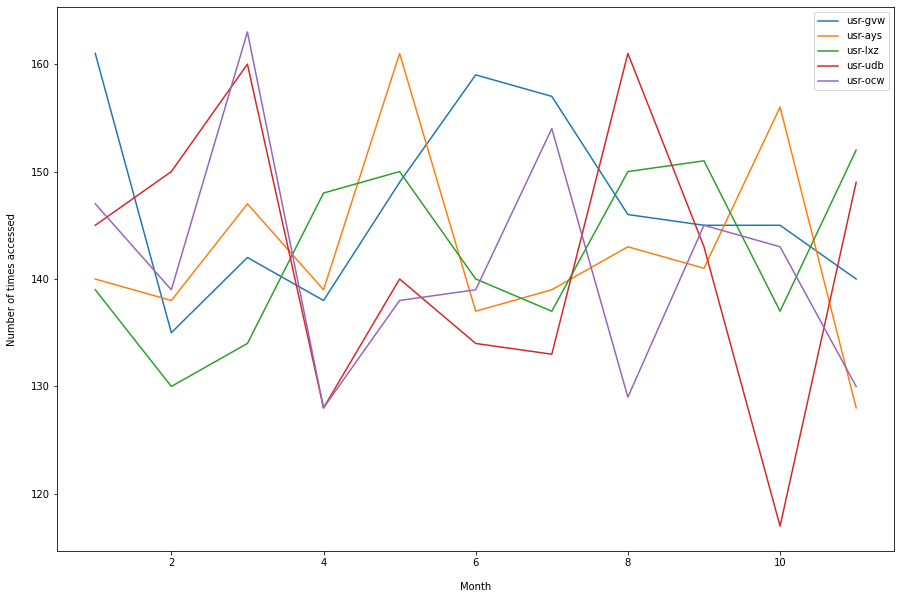

In [19]:
#Number of access for top 5 users who access the /secret the most every month

#usr-gvw 
gvw_df = secret_file[secret_file['user'] == 'usr-gvw']
gvw_count = gvw_df['month'].value_counts().sort_index()
gvw_count.plot(kind='line',label = "usr-gvw",figsize=(15, 10))
#usr-ays
ays_df = secret_file[secret_file['user'] == 'usr-ays']
ays_count = ays_df['month'].value_counts().sort_index()
ays_count.plot(kind='line', label = "usr-ays")

lxz_df = secret_file[secret_file['user'] == 'usr-lxz']
lxz_count = lxz_df['month'].value_counts().sort_index()
lxz_count.plot(kind='line', label = "usr-lxz")

udb_df = secret_file[secret_file['user'] == 'usr-udb']
udb_count = udb_df['month'].value_counts().sort_index()
udb_count.plot(kind='line', label = "usr-udb")

ocw_df = secret_file[secret_file['user'] == 'usr-ocw']
ocw_count = ocw_df['month'].value_counts().sort_index()
ocw_count.plot(kind='line', label = "usr-ocw")

plt.legend()

plt.xlabel("Month", labelpad=14)

plt.ylabel("Number of times accessed", labelpad=14)

plt.show()


In [20]:
gvw_web = web_data[web_data['user'] == 'usr-gvw']
gvw_web

,datetime,user,website
65,2020-01-01 05:12:43.354563,usr-gvw,http://www.ebay.co.uk
74,2020-01-01 05:20:34.669394,usr-gvw,http://www.bbc.co.uk
90,2020-01-01 05:32:12.857375,usr-gvw,http://www.wireshark.com
118,2020-01-01 05:45:50.796604,usr-gvw,http://www.wireshark.com
127,2020-01-01 05:51:24.761401,usr-gvw,http://www.wireshark.com
...,...,...,...
1376026,2020-11-30 20:19:48.854814,usr-gvw,http://www.seesaa.net
1376036,2020-11-30 20:28:55.759884,usr-gvw,http://www.amazon.co.uk
1376059,2020-11-30 20:49:15.919658,usr-gvw,http://www.facebook.com
1376063,2020-11-30 20:53:54.313454,usr-gvw,http://www.nifty.com


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'http://www.l33tcoder.com'),
  Text(1, 0, 'http://www.posterous.com'),
  Text(2, 0, 'http://www.microsoft.com'),
  Text(3, 0, 'http://www.nba.com'),
  Text(4, 0, 'http://www.bbc.co.uk'),
  Text(5, 0, 'http://www.amazon.co.uk'),
  Text(6, 0, 'http://www.eventbrite.com'),
  Text(7, 0, 'http://www.hc360.com'),
  Text(8, 0, 'http://www.python.com'),
  Text(9, 0, 'http://www.kalilinux.com'),
  Text(10, 0, 'http://www.ilovesecurity.com'),
  Text(11, 0, 'http://www.sky.com'),
  Text(12, 0, 'http://www.accuweather.com'),
  Text(13, 0, 'http://www.securityneeds.com'),
  Text(14, 0, 'http://www.facebook.com'),
  Text(15, 0, 'http://www.prlog.org'),
  Text(16, 0, 'http://www.theatlantic.com'),
  Text(17, 0, 'http://www.twitter.com'),
  Text(18, 0, 'http://www.ebay.co.uk'),
  Text(19, 0, 'http://www.icancode.com'),
  Text(20, 0, 'http://www.eepu

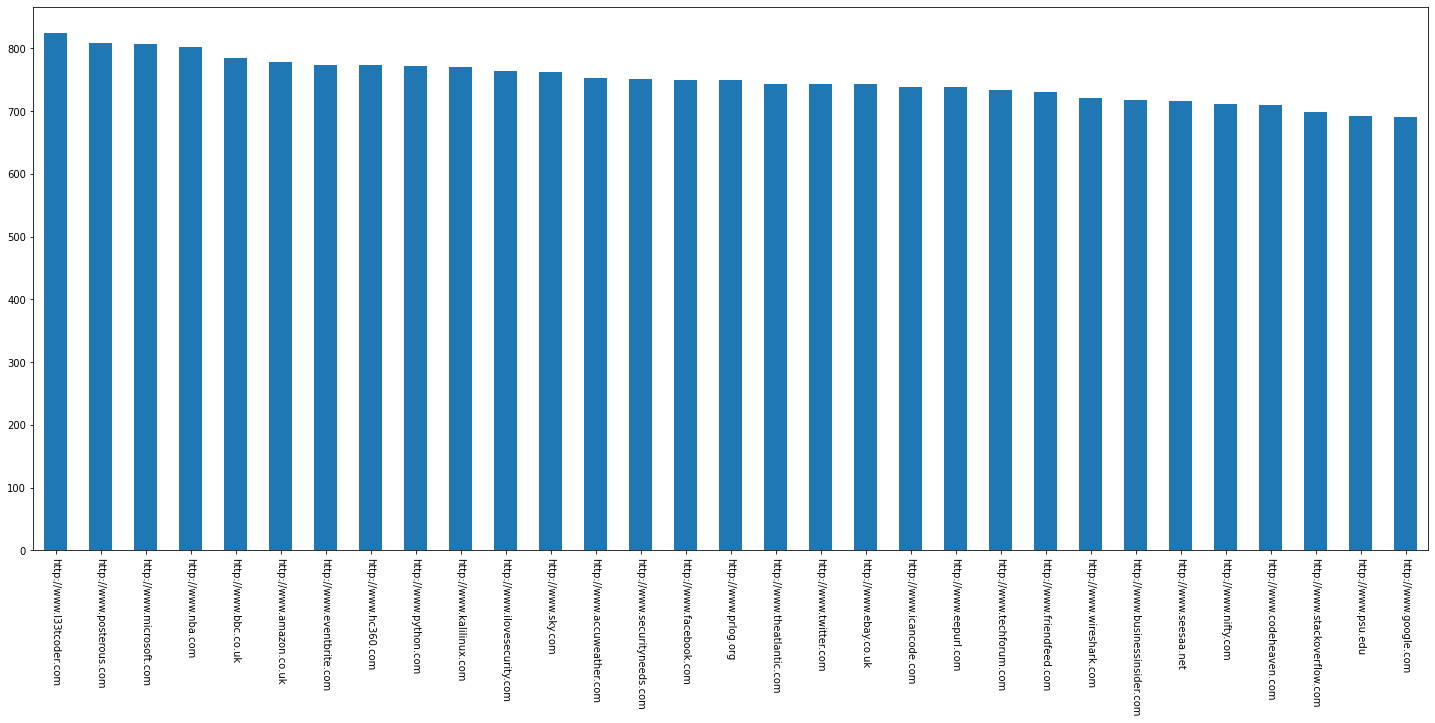

In [21]:
gvw_web['website'].value_counts().plot(kind='bar',figsize=(25, 10))
plt.xticks(rotation=270)

In [22]:
ocw_secret_mar = ocw_df[ocw_df['month']== 3]
ocw_secret_mar

,datetime,user,filename,month,day
679855,2020-03-01 06:12:44.432617,usr-ocw,/secret,3,1
680808,2020-03-01 08:37:41.898140,usr-ocw,/secret,3,1
686064,2020-03-01 13:47:29.489173,usr-ocw,/secret,3,1
691577,2020-03-02 07:33:15.209412,usr-ocw,/secret,3,2
692962,2020-03-02 09:46:41.482720,usr-ocw,/secret,3,2
...,...,...,...,...,...
1016441,2020-03-30 16:28:37.448816,usr-ocw,/secret,3,30
1016852,2020-03-30 17:03:30.236905,usr-ocw,/secret,3,30
1018386,2020-03-30 21:37:36.034556,usr-ocw,/secret,3,30
1022016,2020-03-31 10:46:51.850280,usr-ocw,/secret,3,31


In [23]:
ocw_usb = usb_data[usb_data['user']== 'usr-ocw']
ocw_usb

,datetime,user,action,pc
9,2020-01-01 05:01:43.026311,usr-ocw,usb_insert,pc160
29,2020-01-01 05:58:02.534712,usr-ocw,usb_remove,pc160
207,2020-01-01 09:08:29.525615,usr-ocw,usb_insert,pc160
211,2020-01-01 09:10:08.461798,usr-ocw,usb_insert,pc160
232,2020-01-01 09:33:19.281512,usr-ocw,usb_remove,pc160
...,...,...,...,...
460143,2020-11-30 13:41:00.046614,usr-ocw,usb_remove,pc160
460407,2020-11-30 15:25:20.871388,usr-ocw,usb_insert,pc160
460518,2020-11-30 16:22:31.567231,usr-ocw,usb_remove,pc160
460596,2020-11-30 17:35:35.565770,usr-ocw,usb_insert,pc160


In [24]:
ocw_usb['month'] = ocw_usb['datetime'].dt.month
ocw_usb

/tmp/ipykernel_5449/3162788275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocw_usb['month'] = ocw_usb['datetime'].dt.month


,datetime,user,action,pc,month
9,2020-01-01 05:01:43.026311,usr-ocw,usb_insert,pc160,1
29,2020-01-01 05:58:02.534712,usr-ocw,usb_remove,pc160,1
207,2020-01-01 09:08:29.525615,usr-ocw,usb_insert,pc160,1
211,2020-01-01 09:10:08.461798,usr-ocw,usb_insert,pc160,1
232,2020-01-01 09:33:19.281512,usr-ocw,usb_remove,pc160,1
...,...,...,...,...,...
460143,2020-11-30 13:41:00.046614,usr-ocw,usb_remove,pc160,11
460407,2020-11-30 15:25:20.871388,usr-ocw,usb_insert,pc160,11
460518,2020-11-30 16:22:31.567231,usr-ocw,usb_remove,pc160,11
460596,2020-11-30 17:35:35.565770,usr-ocw,usb_insert,pc160,11


In [25]:
#usr-ocw accessed the /secret file most in March

ocw_usb_mar = ocw_usb[ocw_usb['month']== 3]
ocw_usb_mar

,datetime,user,action,pc,month
82100,2020-03-01 08:14:10.244730,usr-ocw,usb_insert,pc160,3
82137,2020-03-01 08:49:36.666235,usr-ocw,usb_remove,pc160,3
82185,2020-03-01 09:28:49.137854,usr-ocw,usb_insert,pc160,3
82191,2020-03-01 09:34:32.942581,usr-ocw,usb_remove,pc160,3
82232,2020-03-01 09:55:34.726998,usr-ocw,usb_insert,pc160,3
...,...,...,...,...,...
123163,2020-03-30 22:34:49.545078,usr-ocw,usb_remove,pc160,3
123384,2020-03-31 09:16:30.904677,usr-ocw,usb_insert,pc160,3
123479,2020-03-31 10:09:18.816579,usr-ocw,usb_remove,pc160,3
123750,2020-03-31 11:53:54.923913,usr-ocw,usb_insert,pc160,3


In [26]:
ocw_usb_insert = ocw_usb_mar[ocw_usb_mar['action']== 'usb_insert']
ocw_usb_insert

,datetime,user,action,pc,month
82100,2020-03-01 08:14:10.244730,usr-ocw,usb_insert,pc160,3
82185,2020-03-01 09:28:49.137854,usr-ocw,usb_insert,pc160,3
82232,2020-03-01 09:55:34.726998,usr-ocw,usb_insert,pc160,3
82238,2020-03-01 09:57:07.333994,usr-ocw,usb_insert,pc160,3
82254,2020-03-01 10:08:37.048639,usr-ocw,usb_insert,pc160,3
...,...,...,...,...,...
122566,2020-03-30 13:47:47.232186,usr-ocw,usb_insert,pc160,3
123068,2020-03-30 18:14:57.789246,usr-ocw,usb_insert,pc160,3
123160,2020-03-30 22:12:29.016922,usr-ocw,usb_insert,pc160,3
123384,2020-03-31 09:16:30.904677,usr-ocw,usb_insert,pc160,3


In [27]:
ocw_usb_remove = ocw_usb_mar[ocw_usb_mar['action']== 'usb_remove']
ocw_usb_remove

,datetime,user,action,pc,month
82137,2020-03-01 08:49:36.666235,usr-ocw,usb_remove,pc160,3
82191,2020-03-01 09:34:32.942581,usr-ocw,usb_remove,pc160,3
82262,2020-03-01 10:10:23.185817,usr-ocw,usb_remove,pc160,3
82337,2020-03-01 10:37:14.079463,usr-ocw,usb_remove,pc160,3
82342,2020-03-01 10:42:13.765128,usr-ocw,usb_remove,pc160,3
...,...,...,...,...,...
122610,2020-03-30 14:04:34.322519,usr-ocw,usb_remove,pc160,3
123102,2020-03-30 19:08:29.263934,usr-ocw,usb_remove,pc160,3
123163,2020-03-30 22:34:49.545078,usr-ocw,usb_remove,pc160,3
123479,2020-03-31 10:09:18.816579,usr-ocw,usb_remove,pc160,3


In [28]:
ocw_usb_insert['remove datetime'] = None

for index, row in ocw_usb_insert.iterrows():
     remove_datetime = ocw_usb_remove['datetime'].iloc[0]
     ocw_usb_insert.at[index, 'remove datetime'] = remove_datetime
     ocw_usb_remove = ocw_usb_remove.drop(ocw_usb_remove.index[0])

ocw_mar_usb = ocw_usb_insert.rename(columns={'datetime':'insert datetime'})
ocw_mar_usb

/tmp/ipykernel_5449/3544727142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocw_usb_insert['remove datetime'] = None


,insert datetime,user,action,pc,month,remove datetime
82100,2020-03-01 08:14:10.244730,usr-ocw,usb_insert,pc160,3,2020-03-01 08:49:36.666235
82185,2020-03-01 09:28:49.137854,usr-ocw,usb_insert,pc160,3,2020-03-01 09:34:32.942581
82232,2020-03-01 09:55:34.726998,usr-ocw,usb_insert,pc160,3,2020-03-01 10:10:23.185817
82238,2020-03-01 09:57:07.333994,usr-ocw,usb_insert,pc160,3,2020-03-01 10:37:14.079463
82254,2020-03-01 10:08:37.048639,usr-ocw,usb_insert,pc160,3,2020-03-01 10:42:13.765128
...,...,...,...,...,...,...
122566,2020-03-30 13:47:47.232186,usr-ocw,usb_insert,pc160,3,2020-03-30 14:04:34.322519
123068,2020-03-30 18:14:57.789246,usr-ocw,usb_insert,pc160,3,2020-03-30 19:08:29.263934
123160,2020-03-30 22:12:29.016922,usr-ocw,usb_insert,pc160,3,2020-03-30 22:34:49.545078
123384,2020-03-31 09:16:30.904677,usr-ocw,usb_insert,pc160,3,2020-03-31 10:09:18.816579


In [29]:
ocw_secret_mar

,datetime,user,filename,month,day
679855,2020-03-01 06:12:44.432617,usr-ocw,/secret,3,1
680808,2020-03-01 08:37:41.898140,usr-ocw,/secret,3,1
686064,2020-03-01 13:47:29.489173,usr-ocw,/secret,3,1
691577,2020-03-02 07:33:15.209412,usr-ocw,/secret,3,2
692962,2020-03-02 09:46:41.482720,usr-ocw,/secret,3,2
...,...,...,...,...,...
1016441,2020-03-30 16:28:37.448816,usr-ocw,/secret,3,30
1016852,2020-03-30 17:03:30.236905,usr-ocw,/secret,3,30
1018386,2020-03-30 21:37:36.034556,usr-ocw,/secret,3,30
1022016,2020-03-31 10:46:51.850280,usr-ocw,/secret,3,31


In [30]:
access_lst = []
#print("Access datetime between the usb insert and remove action:")

for index, row in ocw_secret_mar.iterrows():
    # Print the values in the row
    #print("USB insert time:",row['insert datetime'],row['remove datetime'])
    
    #insert_time = row['insert datetime']
    
    #print(row['datetime'])
    for index2,row2 in ocw_mar_usb.iterrows():
        insert_time = row2['insert datetime']
        remove_time = row2['remove datetime']
        if row['datetime'] >= insert_time and row['datetime'] <= remove_time:
            
            access_lst.append(row['datetime'])
            
            #between_access = row[row['datetime']]
            #print(between_access)
            #ocw_secret_usb = pd.concat([ocw_secret_usb['access datetime'], between_access])
            #print(row['datetime'])
            
            
            break

access_time = pd.Series(access_lst)

ocw_secret_usb = pd.DataFrame({'access datetime': access_time})




In [31]:
#Dataframe of the /secret folder access record between the usb insert and remove action
ocw_secret_usb

,access datetime
0,2020-03-01 08:37:41.898140
1,2020-03-03 09:59:46.635191
2,2020-03-03 12:43:38.780461
3,2020-03-03 17:42:36.675752
4,2020-03-06 22:30:56.567217
5,2020-03-08 14:42:35.083269
6,2020-03-08 16:51:28.932471
7,2020-03-11 16:37:13.088351
8,2020-03-13 18:53:35.587771
9,2020-03-14 17:11:26.539269


<AxesSubplot:>

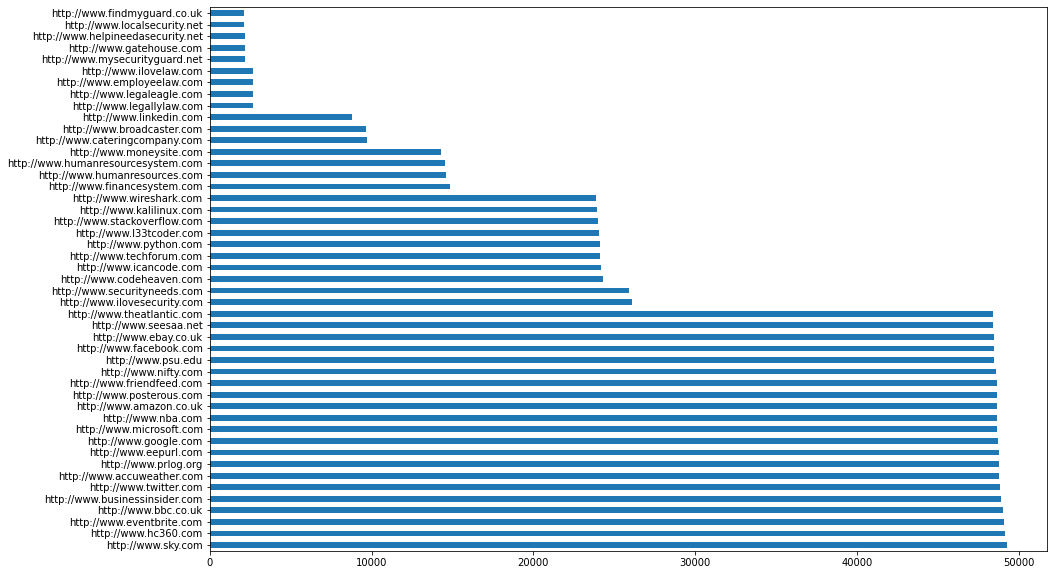

In [32]:

web_data['website'].value_counts().plot(kind='barh',figsize=(15, 10))

In [33]:
#Filter the dataframe that only contains the record of access to twitter
twitter_webdata = web_data[web_data['website'] == 'http://www.twitter.com']
twitter_webdata

,datetime,user,website
62,2020-01-01 05:10:01.147509,usr-tqd,http://www.twitter.com
66,2020-01-01 05:14:53.873746,usr-xsn,http://www.twitter.com
70,2020-01-01 05:18:11.720250,usr-dry,http://www.twitter.com
135,2020-01-01 05:56:02.936250,usr-yhv,http://www.twitter.com
187,2020-01-01 06:18:40.977079,usr-tqd,http://www.twitter.com
...,...,...,...
1376028,2020-11-30 20:22:53.434373,usr-orw,http://www.twitter.com
1376071,2020-11-30 20:58:32.058417,usr-cvh,http://www.twitter.com
1376074,2020-11-30 21:02:01.921917,usr-ebj,http://www.twitter.com
1376090,2020-11-30 21:15:02.770118,usr-ays,http://www.twitter.com


In [34]:
#Filter the dataframe that only contains the record of access to facebook
facebook_webdata = web_data[web_data['website'] == 'http://www.facebook.com']
facebook_webdata

,datetime,user,website
16,2020-01-01 04:13:32.168410,usr-une,http://www.facebook.com
37,2020-01-01 04:48:35.286926,usr-mcr,http://www.facebook.com
87,2020-01-01 05:29:05.504041,usr-yhv,http://www.facebook.com
143,2020-01-01 05:59:38.900854,usr-lxz,http://www.facebook.com
159,2020-01-01 06:03:56.186323,usr-ebj,http://www.facebook.com
...,...,...,...
1375958,2020-11-30 19:43:00.345580,usr-yhv,http://www.facebook.com
1375991,2020-11-30 19:59:26.127301,usr-lxz,http://www.facebook.com
1376033,2020-11-30 20:25:50.352003,usr-gsw,http://www.facebook.com
1376037,2020-11-30 20:28:56.840965,usr-zoj,http://www.facebook.com


In [35]:
facebook_access_counts = facebook_webdata['user'].value_counts()
top_5_users = facebook_access_counts.head(5)
print(top_5_users)

usr-dry    832
usr-hvd    823
usr-iba    802
usr-udb    801
usr-fbi    798
Name: user, dtype: int64


In [36]:
#Five users who access to twitter.com most
twitter_access_counts = twitter_webdata['user'].value_counts()
top_5_users = twitter_access_counts.head(5)
print(top_5_users)

usr-dry    821
usr-jsn    814
usr-mcr    808
usr-qjv    805
usr-ocw    800
Name: user, dtype: int64


In [37]:
usr_iba = employee_data[employee_data['user'] == 'usr-iba']
usr_iba

,user,role,email,pc
102,usr-iba,Technical,usr-iba@onlinebargains.com,pc102


In [38]:
usr_udb = employee_data[employee_data['user'] == 'usr-udb']
usr_udb

,user,role,email,pc
66,usr-udb,Technical,usr-udb@onlinebargains.com,pc66


In [39]:
usr_fbi = employee_data[employee_data['user'] == 'usr-fbi']
usr_fbi

,user,role,email,pc
177,usr-fbi,Technical,usr-fbi@onlinebargains.com,pc177


In [40]:
usr_hvd = employee_data[employee_data['user'] == 'usr-hvd']
usr_hvd

,user,role,email,pc
109,usr-hvd,Technical,usr-hvd@onlinebargains.com,pc109


In [41]:
#usr-dry accessed the twitter most 
usr_dry = employee_data[employee_data['user'] == 'usr-dry']
usr_dry

,user,role,email,pc
234,usr-dry,Technical,usr-dry@onlinebargains.com,pc234


In [42]:
usr_jsn  = employee_data[employee_data['user'] == 'usr-jsn']
usr_jsn

,user,role,email,pc
237,usr-jsn,Technical,usr-jsn@onlinebargains.com,pc237


In [83]:
usr_gvw  = employee_data[employee_data['user'] == 'usr-gvw']
usr_gvw

,user,role,email,pc
87,usr-gvw,Technical,usr-gvw@onlinebargains.com,pc87


In [43]:
usr_mcr  = employee_data[employee_data['user'] == 'usr-mcr']
usr_mcr

,user,role,email,pc
13,usr-mcr,Technical,usr-mcr@onlinebargains.com,pc13


In [44]:
usr_qjv  = employee_data[employee_data['user'] == 'usr-qjv']
usr_qjv

,user,role,email,pc
132,usr-qjv,Technical,usr-qjv@onlinebargains.com,pc132


In [45]:
usr_ocw  = employee_data[employee_data['user'] == 'usr-ocw']
usr_ocw

,user,role,email,pc
160,usr-ocw,Technical,usr-ocw@onlinebargains.com,pc160


In [46]:
usr_rjv  = employee_data[employee_data['user'] == 'usr-rjv']
usr_rjv

,user,role,email,pc
96,usr-rjv,Finance,usr-rjv@onlinebargains.com,pc96


<AxesSubplot:>

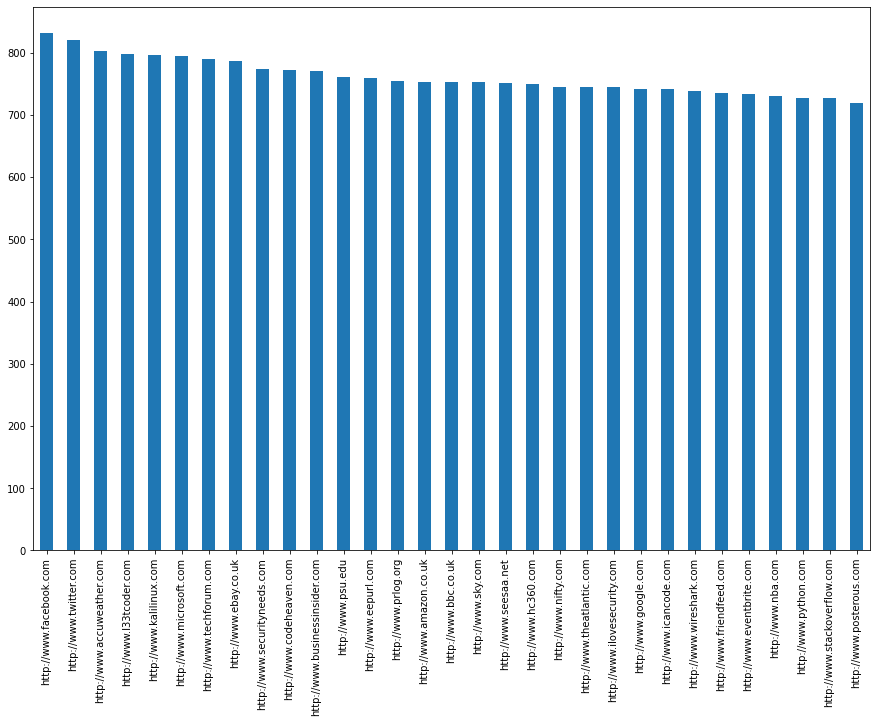

In [47]:
#The web data of usr_dry
usr_dry_web = web_data[web_data['user'] == 'usr-dry']
usr_dry_web['website'].value_counts().plot(kind='bar',figsize=(15, 10))

In [48]:
usr_dry_facebook = usr_dry_web[usr_dry_web['website']== 'http://www.facebook.com']
usr_dry_facebook

,datetime,user,website
541,2020-01-01 08:11:50.093952,usr-dry,http://www.facebook.com
3790,2020-01-01 20:00:46.417234,usr-dry,http://www.facebook.com
7331,2020-01-02 17:50:46.396598,usr-dry,http://www.facebook.com
7377,2020-01-02 18:06:36.768372,usr-dry,http://www.facebook.com
10615,2020-01-03 14:32:46.902109,usr-dry,http://www.facebook.com
...,...,...,...
1365147,2020-11-28 10:55:12.994669,usr-dry,http://www.facebook.com
1368199,2020-11-29 07:24:42.055182,usr-dry,http://www.facebook.com
1370132,2020-11-29 13:28:51.218920,usr-dry,http://www.facebook.com
1371986,2020-11-30 04:30:35.227593,usr-dry,http://www.facebook.com


In [49]:
twitter_access = twitter_webdata['user'].unique()
twitter_access_df = pd.DataFrame()
for i in twitter_access:
    if i in employee_data['user'].values:
        matching_row = employee_data[employee_data['user'] == i]
        
        twitter_access_df = pd.concat([twitter_access_df, matching_row])
        
twitter_access_df

,user,role,email,pc
125,usr-tqd,Technical,usr-tqd@onlinebargains.com,pc125
30,usr-xsn,Services,usr-xsn@onlinebargains.com,pc30
234,usr-dry,Technical,usr-dry@onlinebargains.com,pc234
143,usr-yhv,Technical,usr-yhv@onlinebargains.com,pc143
145,usr-hpt,Security,usr-hpt@onlinebargains.com,pc145
...,...,...,...,...
64,usr-lnn,Director,usr-lnn@onlinebargains.com,pc64
73,usr-hfn,Director,usr-hfn@onlinebargains.com,pc73
151,usr-zwq,Director,usr-zwq@onlinebargains.com,pc151
111,usr-hfz,Security,usr-hfz@onlinebargains.com,pc111


<AxesSubplot:>

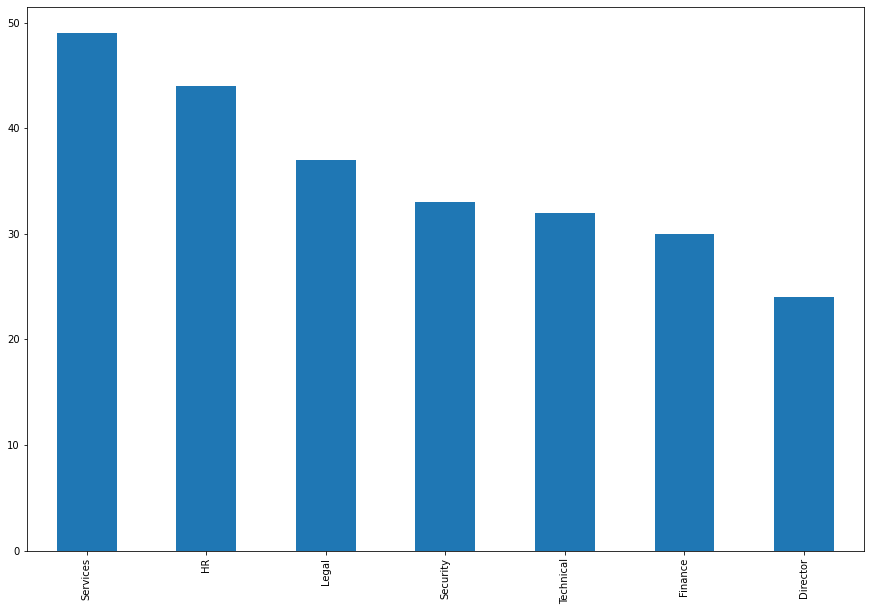

In [50]:
employee_data['role'].value_counts().plot(kind='bar',figsize=(15, 10))

In [51]:
#Usr-rjv who accessed the client file most, checking his login data
rjv_login = login_data[login_data['user']=='usr-rjv']
rjv_login

,datetime,user,action,pc
200,2020-01-01 09:31:05,usr-rjv,login,pc96
270,2020-01-01 15:28:28,usr-rjv,logoff,pc96
633,2020-01-02 08:04:40,usr-rjv,login,pc96
760,2020-01-02 15:20:40,usr-rjv,logoff,pc96
1160,2020-01-03 09:01:31,usr-rjv,login,pc96
...,...,...,...,...
165708,2020-11-28 17:43:08,usr-rjv,logoff,pc96
166002,2020-11-29 08:57:29,usr-rjv,login,pc96
166142,2020-11-29 16:24:06,usr-rjv,logoff,pc96
166546,2020-11-30 09:36:06,usr-rjv,login,pc96


In [81]:
ays_login = login_data[login_data['user']=='usr-ays']
ays_login

,datetime,user,action,pc
122,2020-01-01 06:55:43,usr-ays,login,pc167
444,2020-01-01 20:09:04,usr-ays,logoff,pc167
604,2020-01-02 06:24:50,usr-ays,login,pc167
947,2020-01-02 20:03:26,usr-ays,logoff,pc167
1075,2020-01-03 05:23:42,usr-ays,login,pc167
...,...,...,...,...
165808,2020-11-28 22:06:42,usr-ays,logoff,pc167
165921,2020-11-29 05:43:32,usr-ays,login,pc167
166272,2020-11-29 20:30:32,usr-ays,logoff,pc167
166424,2020-11-30 06:06:53,usr-ays,login,pc167


In [80]:
top_5_secret

,datetime,filename,month,day
user,,,,
usr-gvw,1617,1617,1617,1617
usr-ays,1569,1569,1569,1569
usr-lxz,1568,1568,1568,1568
usr-udb,1560,1560,1560,1560
usr-ocw,1555,1555,1555,1555


In [52]:
wer_login = login_data[login_data['user']=='usr-wer']
wer_login

,datetime,user,action,pc
160,2020-01-01 08:53:06,usr-wer,login,pc105
385,2020-01-01 17:51:51,usr-wer,logoff,pc105
672,2020-01-02 09:01:40,usr-wer,login,pc105
873,2020-01-02 17:32:52,usr-wer,logoff,pc105
1148,2020-01-03 08:37:57,usr-wer,login,pc105
...,...,...,...,...
165670,2020-11-28 16:37:48,usr-wer,logoff,pc105
166043,2020-11-29 09:25:34,usr-wer,login,pc105
166194,2020-11-29 17:27:25,usr-wer,logoff,pc105
166481,2020-11-30 08:31:24,usr-wer,login,pc105


In [53]:
tiz_login = login_data[login_data['user']=='usr-tiz']
tiz_login

,datetime,user,action,pc
232,2020-01-01 09:52:45,usr-tiz,login,pc11
377,2020-01-01 17:38:02,usr-tiz,logoff,pc11
741,2020-01-02 09:58:24,usr-tiz,login,pc11
877,2020-01-02 17:38:52,usr-tiz,logoff,pc11
1145,2020-01-03 08:34:14,usr-tiz,login,pc11
...,...,...,...,...
165654,2020-11-28 16:15:40,usr-tiz,logoff,pc11
166007,2020-11-29 09:03:57,usr-tiz,login,pc11
166100,2020-11-29 15:17:04,usr-tiz,logoff,pc11
166514,2020-11-30 09:09:30,usr-tiz,login,pc11


In [54]:
#Most secret file accessed user
gvw_login = login_data[login_data['user']=='usr-gvw']
gvw_login

,datetime,user,action,pc
64,2020-01-01 05:11:52,usr-gvw,login,pc87
491,2020-01-01 23:10:21,usr-gvw,logoff,pc87
565,2020-01-02 05:14:28,usr-gvw,login,pc87
956,2020-01-02 21:02:58,usr-gvw,logoff,pc87
1086,2020-01-03 05:45:27,usr-gvw,login,pc87
...,...,...,...,...
165805,2020-11-28 21:49:13,usr-gvw,logoff,pc87
165914,2020-11-29 05:29:25,usr-gvw,login,pc87
166257,2020-11-29 19:25:09,usr-gvw,logoff,pc87
166366,2020-11-30 04:15:19,usr-gvw,login,pc87


In [55]:
gvw_logoff = gvw_login[gvw_login['action']=='logoff']
gvw_logoff

,datetime,user,action,pc
491,2020-01-01 23:10:21,usr-gvw,logoff,pc87
956,2020-01-02 21:02:58,usr-gvw,logoff,pc87
1455,2020-01-03 21:30:51,usr-gvw,logoff,pc87
1922,2020-01-04 18:37:52,usr-gvw,logoff,pc87
2472,2020-01-05 23:06:42,usr-gvw,logoff,pc87
...,...,...,...,...
164797,2020-11-26 20:52:07,usr-gvw,logoff,pc87
165290,2020-11-27 20:27:19,usr-gvw,logoff,pc87
165805,2020-11-28 21:49:13,usr-gvw,logoff,pc87
166257,2020-11-29 19:25:09,usr-gvw,logoff,pc87


In [56]:
gvw_logoff = gvw_login[gvw_login['action']=='logoff']
gvw_logoff

,datetime,user,action,pc
491,2020-01-01 23:10:21,usr-gvw,logoff,pc87
956,2020-01-02 21:02:58,usr-gvw,logoff,pc87
1455,2020-01-03 21:30:51,usr-gvw,logoff,pc87
1922,2020-01-04 18:37:52,usr-gvw,logoff,pc87
2472,2020-01-05 23:06:42,usr-gvw,logoff,pc87
...,...,...,...,...
164797,2020-11-26 20:52:07,usr-gvw,logoff,pc87
165290,2020-11-27 20:27:19,usr-gvw,logoff,pc87
165805,2020-11-28 21:49:13,usr-gvw,logoff,pc87
166257,2020-11-29 19:25:09,usr-gvw,logoff,pc87


In [57]:
gvw_login = gvw_login[gvw_login['action']=='login']
gvw_login

,datetime,user,action,pc
64,2020-01-01 05:11:52,usr-gvw,login,pc87
565,2020-01-02 05:14:28,usr-gvw,login,pc87
1086,2020-01-03 05:45:27,usr-gvw,login,pc87
1530,2020-01-04 04:20:09,usr-gvw,login,pc87
2111,2020-01-05 06:54:08,usr-gvw,login,pc87
...,...,...,...,...
164368,2020-11-26 04:05:39,usr-gvw,login,pc87
164875,2020-11-27 04:20:30,usr-gvw,login,pc87
165418,2020-11-28 05:51:16,usr-gvw,login,pc87
165914,2020-11-29 05:29:25,usr-gvw,login,pc87


In [58]:
gvw_login = gvw_login.rename(columns={'datetime':'login datetime'})
gvw_login 

,login datetime,user,action,pc
64,2020-01-01 05:11:52,usr-gvw,login,pc87
565,2020-01-02 05:14:28,usr-gvw,login,pc87
1086,2020-01-03 05:45:27,usr-gvw,login,pc87
1530,2020-01-04 04:20:09,usr-gvw,login,pc87
2111,2020-01-05 06:54:08,usr-gvw,login,pc87
...,...,...,...,...
164368,2020-11-26 04:05:39,usr-gvw,login,pc87
164875,2020-11-27 04:20:30,usr-gvw,login,pc87
165418,2020-11-28 05:51:16,usr-gvw,login,pc87
165914,2020-11-29 05:29:25,usr-gvw,login,pc87


In [59]:
gvw_login['logoff datetime'] = None
gvw_login

,login datetime,user,action,pc,logoff datetime
64,2020-01-01 05:11:52,usr-gvw,login,pc87,None
565,2020-01-02 05:14:28,usr-gvw,login,pc87,None
1086,2020-01-03 05:45:27,usr-gvw,login,pc87,None
1530,2020-01-04 04:20:09,usr-gvw,login,pc87,None
2111,2020-01-05 06:54:08,usr-gvw,login,pc87,None
...,...,...,...,...,...
164368,2020-11-26 04:05:39,usr-gvw,login,pc87,None
164875,2020-11-27 04:20:30,usr-gvw,login,pc87,None
165418,2020-11-28 05:51:16,usr-gvw,login,pc87,None
165914,2020-11-29 05:29:25,usr-gvw,login,pc87,None


In [60]:
#Merge the logoff datetime and the login datetime in one row
for index, row in gvw_login.iterrows():
     logoff_datetime = gvw_logoff['datetime'].iloc[0]
     gvw_login.at[index, 'logoff datetime'] = logoff_datetime
     gvw_logoff = gvw_logoff.drop(gvw_logoff.index[0])

gvw_login = gvw_login.drop('action', axis=1)
#gvw_login

In [76]:
#Calculate the duration for each login time 
import pandas as pd
from datetime import timedelta

gvw_login['duration'] = None

for index, row in gvw_login.iterrows():
    gvw_login.at[index, 'duration'] = row['logoff datetime'] - row['login datetime']

gvw_login

,login datetime,user,pc,logoff datetime,duration
64,2020-01-01 05:11:52,usr-gvw,pc87,2020-01-01 23:10:21,0 days 17:58:29
565,2020-01-02 05:14:28,usr-gvw,pc87,2020-01-02 21:02:58,0 days 15:48:30
1086,2020-01-03 05:45:27,usr-gvw,pc87,2020-01-03 21:30:51,0 days 15:45:24
1530,2020-01-04 04:20:09,usr-gvw,pc87,2020-01-04 18:37:52,0 days 14:17:43
2111,2020-01-05 06:54:08,usr-gvw,pc87,2020-01-05 23:06:42,0 days 16:12:34
...,...,...,...,...,...
164368,2020-11-26 04:05:39,usr-gvw,pc87,2020-11-26 20:52:07,0 days 16:46:28
164875,2020-11-27 04:20:30,usr-gvw,pc87,2020-11-27 20:27:19,0 days 16:06:49
165418,2020-11-28 05:51:16,usr-gvw,pc87,2020-11-28 21:49:13,0 days 15:57:57
165914,2020-11-29 05:29:25,usr-gvw,pc87,2020-11-29 19:25:09,0 days 13:55:44


In [78]:
#Find usr-gvw's average of the duartion in login time
gvw_login['duration_hours'] = gvw_login['duration'].apply(lambda x: x / timedelta(hours=1))

# Calculate the mean of the 'duration_hours' column
mean_duration_hours = gvw_login['duration_hours'].mean()

# Print the mean duration in hours
print(mean_duration_hours)


15.526525704809286


# Conclusion - Summary of Findings

In [62]:
#Part 1: Potential Threat and Suspicious Behaviour

#1.usr-rhd is suspicious, he is the only Director employee who accessed clients' document and he only accessed that folder in August

#2. usr-rhd access to client's document within the same day 5-Aug

#3. usr-ocw is one of the employee who accessed the /secret file most, 
  #3.1 he accessed to the secret file most in March
  #3.2 He got 24 records in March that he accessed the secret file meanwhile between the usb action of insert and remove
     #3.2.1 Although my investigation got no evidence what exactly what he did in the usb action, it is still possible that he might use his own usb hard-drive to extract sensitive data from the secret folder during these 24 accesses.

#4. Employees spent quite a lot of times on social media
 #4.1 Twitter is the 6th most employees accessed website 
 #4.2 Top 5 users who used social media most during the work time are all technicians
    #4.2.1 It might implies that the techicians in this company might be underperformed since they spent so much time on using social media
 #4.3 Social Media in the workplace can potentially bring cyber security threats to the company
    #4.3.1 The hackers like to  spread malicious links via the social media, the sensitive data in the company might be stolen by the hackers
    #4.3.2 Techinicans is also one of the role that will access to secret file, if their pc got hacked by hackers that the secret files will be leaked

#5. Some Technicians having a long duration of log-in time, which some of their login time started at late night like 4am or 5am
  #5.1 this situation may indicates that someone has gained unauthorized access to their system since it doesn't look like 4am-5am is during working hour
  #5.2 usr-gvw who is a technician and he accessed most on ./secret file
     #5.2.1 His duration of login hours is 15 hours which is longer than the normal working hour 8-9 hours
  #5.3 By combining the web_data I have investigated that the Technicians used most on social media which may indicates some Technicians' pc have been gained unauthorized access by hackers.









